In [1]:
import tensorflow as tf
from utils.architectures import residual_attention_56
from utils.plot import getAccuracyPlot, getLossPlot

In [2]:
cifar100 = tf.keras.datasets.cifar100 #load dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data() #load dataset
y_train = tf.keras.utils.to_categorical(y_train, 100) #create one-hot encoding vectors for 10 classes
y_test = tf.keras.utils.to_categorical(y_test, 100) #create one-hot encoding vectors for 10 classes


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=25,
                                                          width_shift_range=0.25,
                                                          height_shift_range=0.25,
                                                          horizontal_flip=True,
                                                          validation_split=0.2) #Data Augmentation
X_train = X_train.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image
X_test = X_test.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image

datagen.fit(X_train)  #Applying Data Augmentation to the training dataset

input_shape = X_train.shape[1:]
output_size = 100

169009152/169001437 [==============================] - 2s 0us/step


In [3]:
model = residual_attention_56(input_shape=input_shape, output_size=output_size)

In [4]:
model.compile(tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 16, 16, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 16, 16, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64, subset='training'), validation_data=datagen.flow(X_train, y_train, batch_size=64, subset='validation'),
                    epochs=200)

Epoch 1/200
625/625 [==============================] - 52s 64ms/step - loss: 4.2984 - accuracy: 0.0410 - val_loss: 4.3614 - val_accuracy: 0.0551
Epoch 2/200
625/625 [==============================] - 38s 61ms/step - loss: 4.0024 - accuracy: 0.0763 - val_loss: 4.5874 - val_accuracy: 0.0268
Epoch 3/200
625/625 [==============================] - 38s 61ms/step - loss: 4.1292 - accuracy: 0.0529 - val_loss: 4.9265 - val_accuracy: 0.0244
Epoch 4/200
625/625 [==============================] - 38s 61ms/step - loss: 4.0301 - accuracy: 0.0665 - val_loss: 4.2437 - val_accuracy: 0.0572
Epoch 5/200
625/625 [==============================] - 38s 61ms/step - loss: 3.9234 - accuracy: 0.0864 - val_loss: 4.6099 - val_accuracy: 0.0526
Epoch 6/200
625/625 [==============================] - 38s 61ms/step - loss: 3.8447 - accuracy: 0.0964 - val_loss: 13.1983 - val_accuracy: 0.0089
Epoch 7/200
625/625 [==============================] - 38s 61ms/step - loss: 4.2178 - accuracy: 0.0526 - val_loss: 4.1602 - val_a

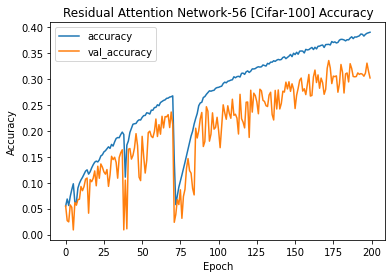

In [10]:
getAccuracyPlot(history, 'Residual Attention Network-56 [Cifar-100]')

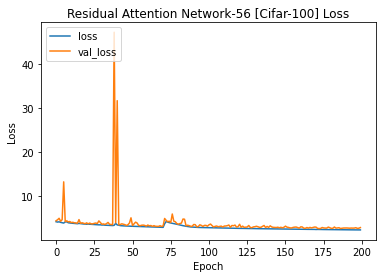

In [11]:
getLossPlot(history, 'Residual Attention Network-56 [Cifar-100]')